# Stock Price Prediction - Notebook 2 - EDA <a class="tocSkip">
    
In this notebook I will be conducting an exploratory data analysis on the historical stock prices of the cleaned apple dataframe. Time series Data, which is also referred to as historical data or past data is set of data which has been collected over a period of time. This is a form of sequential data of which we can often find patterns by looking at the past value/s of the variable in question, which ultimately defines most time series analyses of today.

Time series data can be used for forecasting, understanding of the nature of the variable and finding patterns and trends within the dataset. Forecasting plays an important role in nearly all fields of science, engineering, finance, business, economics etc.
    
In this project I will be focusing primarily on the Adjusted Close Price value of which I will be modeling based on historical values of this variable. This is a univariate problem, where I will be focusing on analysing just this one variable and will attempt to forecast the next day stock price.
    
Initially I will be exploring the full dataset and will move towards removing all other columns as they are not required for my modelling approach.

<br>
<br>
<br>

## Importing Libraries and Loading Cleaned Dataset

Below I import all the required python libraries and the cleaned dataset from the pkl files previously saved.

In [1]:
import numpy as np
import pandas as pd
import joblib

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
apple_df_clean = joblib.load('apple_df_clean.pkl')

In [3]:
apple_df_clean

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.851942
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.780115
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.791531
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.723033
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.757282
...,...,...,...,...,...,...
2020-12-25,133.460007,131.100006,131.320007,131.970001,54930100.0,130.404587
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.068604
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.270172


<br>
<br>
<br>

## Exploratory analysis

### Initial Look at the General Variation in Apple Stock Price

At first I will have an initial look at the plot for adjusted closing price and descriptive statistics for every column of this dataset.

In [4]:
# Creating a new dataframe using a copy for the target column from the original dataset
apple_df_adjclose = pd.DataFrame(apple_df_clean['Adj Close']).copy()
apple_df_adjclose

,Adj Close
Date,
2000-01-03,0.851942
2000-01-04,0.780115
2000-01-05,0.791531
2000-01-06,0.723033
2000-01-07,0.757282
...,...
2020-12-25,130.404587
2020-12-28,135.068604
2020-12-29,133.270172


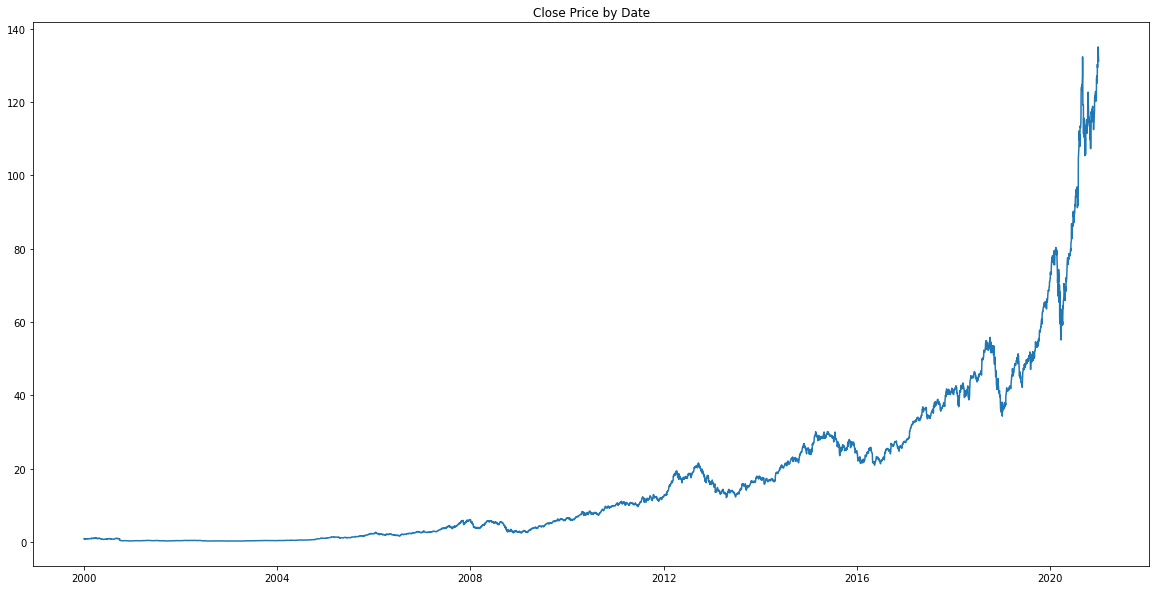

In [5]:
# Plotting the Close Price by the date using pyplot
plt.figure(figsize = (20,10))
plt.plot(apple_df_adjclose)
plt.title('Close Price by Date')
plt.show()

It can be seen that the mean is not constant here as we see a significant upward trend from the year 2000 to 2021. In particular the line plot displays an exponential nature where there seems to be large increases over the past 3 years.It can also be suspected that there are some elements of seasonality as there seems peaks and troughs at what seems like regular intervals. This will be important to investigate for modelling but for now I will continue with looking at the statistics using describe().

<br>

### Descriptive Statistics

The descriptive statistics below indicate that every column except for the Volume colume are extremely highly correlated with one another. We can see that all of the statistics from mean and standard deviation to the quartiles are close to being exact with one another. Volume on the other hand does not indicate this kind of relationship yet. I will proceed with having a quick look at a corellation plot and heatmap.

In [6]:
# Using describe() to generate all the descriptive statistics. 
# We can get an initial outlook the central tendency, dispersion and shape of the dataset's distribution
apple_df_clean.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5479.000000,5479.000000,5479.000000,5479.000000,5.479000e+03,5479.000000
mean,18.899330,18.499689,18.701176,18.707285,4.422878e+08,17.487945
std,24.079561,23.505069,23.794789,23.806595,3.890447e+08,23.333293
min,0.235536,0.227143,0.231964,0.234286,3.934000e+07,0.199710
25%,1.365536,1.332768,1.349465,1.353215,1.757584e+08,1.153504
50%,9.264286,9.071786,9.168214,9.174286,3.283280e+08,7.820324
75%,27.915000,27.293751,27.572499,27.583751,5.899446e+08,25.307754
max,138.789993,134.339996,138.050003,136.690002,7.421641e+09,135.068604


The correlation heatmap confirms the previous expectation and this is in fact not a suprise as all of these columns are very closely related to each other. The correlation plot and the dataframe below that uses the pearson r correlation coefficient which is a number between -1 and 1. 

This statistic measures the linear correlation between 2 variables where -1 infers a perfect negative correlation and 1 a perfect positive correlation. A positive correlation simply means that the the two variables would move in the same direction, in other words when one increases the other is also expected to increase. A negative correlation indicates the opposite of this, where an increase in one variable will indicate that the other variable is expected to decrease.

The heatmap below demonstrates a perfect positive correlation between all of the variables xcept for volume.

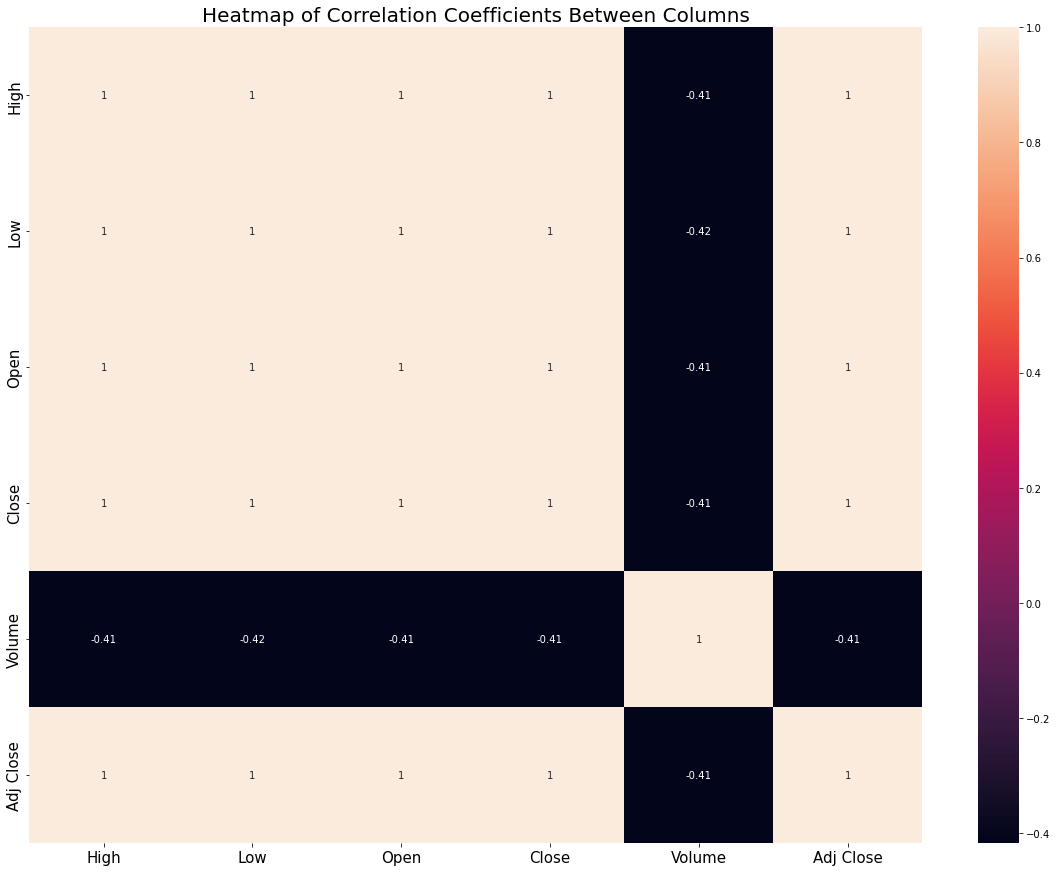

In [7]:
# Using seaborn to plot a heatmap of the pearson r correlation between columns using .corr()
plt.figure(figsize = (20,15))
sns.heatmap(apple_df_clean.corr(method='pearson'), annot=True)
plt.title('Heatmap of Correlation Coefficients Between Columns', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Below it can be seen that the Volume is negatively correlated with all the other variables. This coefficient is around -0.41 which could be interpreted as moderately correlated with the other variables. A negative correlation means that the volume of trades is likely to decrease as all of these price values increase. 

Intuitively this can be explained by simply thinking of it as the price becoming more expensive for investors. An increase in price could result in deterring investors from trading more of the stock due to it being more difficult to justify buying the stock.

In [8]:
# Calling the 5th row of the corr() dataframe to show volume
display(apple_df_clean.corr(method='pearson')[4:5])
print('Volume has a correlation coeefficient of -0.41 with all other columns')

,High,Low,Open,Close,Volume,Adj Close
Volume,-0.412997,-0.416955,-0.414546,-0.414929,1.0,-0.411541


Volume has a correlation coeefficient of -0.41 with all other columns


<br>

### Distributions of Each Column

Next I will look at the distributions for each column to investigate how the data is spread out. I will use both histograms and box-plots for this as they can both give useful information on the data.

#### Histogram Distribution Plot of Each Column

A histogram allows us to see the number of occurences (count) for a specified price range (bin). In the case of time series data, it also translates to how long apple stock had been at this price range in terms of days. 

The histogram was plotted for each column with the use of subplots to make the plots adjacent to each other in order to easily compare. Using a for loop I iterate through each column and plot the histogram plot with additional features to visualise including the KDE (kernel density estimate), mean line and median line.

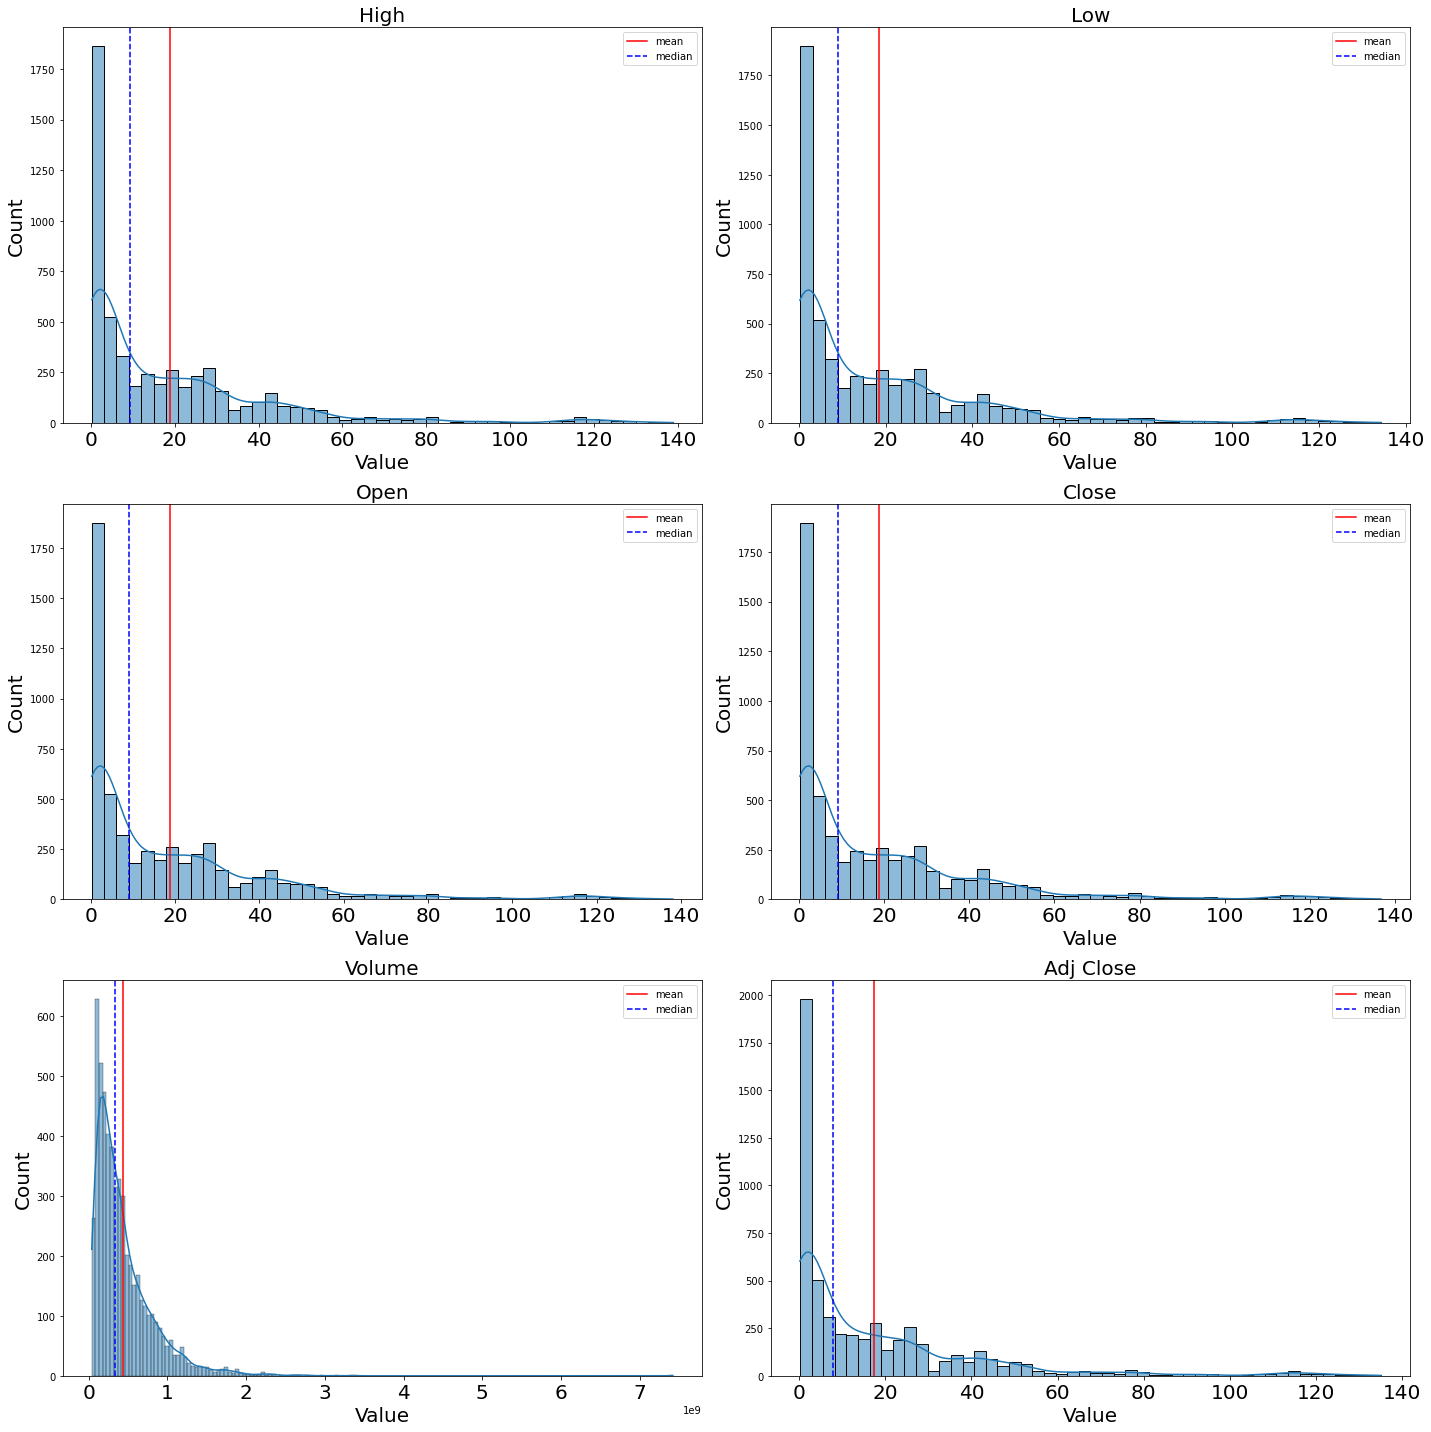

In [9]:
# Creating a subplot structure
plt.subplots(3,2, figsize = (20, 20))

# I use this counter in order to count through each iteration of the for loop thus allowing me to input the final
# parameter for the position of the subplot
counter = 1

# For loop which iterates through the columns called in the cleaned df. Each iteration allows me to call on the 
# Relevant column when setting the data, the subplot also includes the counter which is 1 for now and increases at the
# end of each iteration
for col in apple_df_clean.columns:
    plt.subplot(3,2, counter)
    mean = apple_df_clean[col].mean()
    median = apple_df_clean[col].median()

    # Plotting a histogram, with kde and lines marking mean and median. As well as specifying formatting parameters.
    sns.histplot(data = apple_df_clean[col], kde=True);
    plt.axvline(mean, label='mean', color = 'red')
    plt.axvline(median, label='median', color = 'blue', linestyle = '--')
    plt.title(col, size = 20)
    plt.xlabel('Value', size = 20)
    plt.xticks(size = 20)
    plt.ylabel('Count', size = 20)
    plt.legend()
    
# Counter = Counter + 1, a value of 1 will now be 2 in the next iteration and so on
    counter += 1

plt.tight_layout()

plt.show()

These plots are all extremely right/positively skewed. We already know that the mean and medians are almost identical for all of the price columns and can see that the median is closer to the majority of values compared to the mean. This indicates the presence of large outliers of which the values can be seen on the ploot (ranging up to 140)

It can be seen that for price, the majority of values fall within the low range which we witnessed before in the line where the price shot up significantly over the past 3 years. This histogram plot demonstrates how the price was mostly low since the last 10 years which can be justified by looking at the line plot. The price had a slow gradual increase until recent years where it consistently grew exponentially.

The apple stock was at it's lowest price range for the longest time being almost 2000 business days which is almost 8 years (2000/255 = 7.8, 255 as there are approximately 255 business days every year). For a mature stock like this, it is actually not a suprise as it is normal for companies to take years to grow and we would not expect the price to shoot up so quickly upon listing. Generally we see slow growth and then a sudden spurt of rapid growth. This seems like a classic example of this.

#### Box-Plot Distribution Plot of Each Column

The box-plot allows us to visualise the distribution in a different way. This plot displays the distributions by values rather than the count and explains distribution through ranges. the middle box explains where 50% of the data fall. The box being closer to either whisker indicates a skew (the bottom being a right/positive skew and top being a left/negative skew). As expecteed we can see that the price displays this skew quite clearly. 

The diagram below compares a normally distributed boxplot to a normally distributed probability density function which illustrates how we can intepret the range. Outside the boxplot whiskers, the points are considers as outliers.

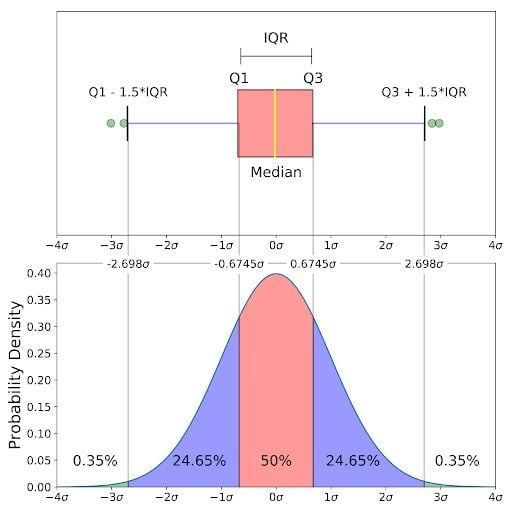

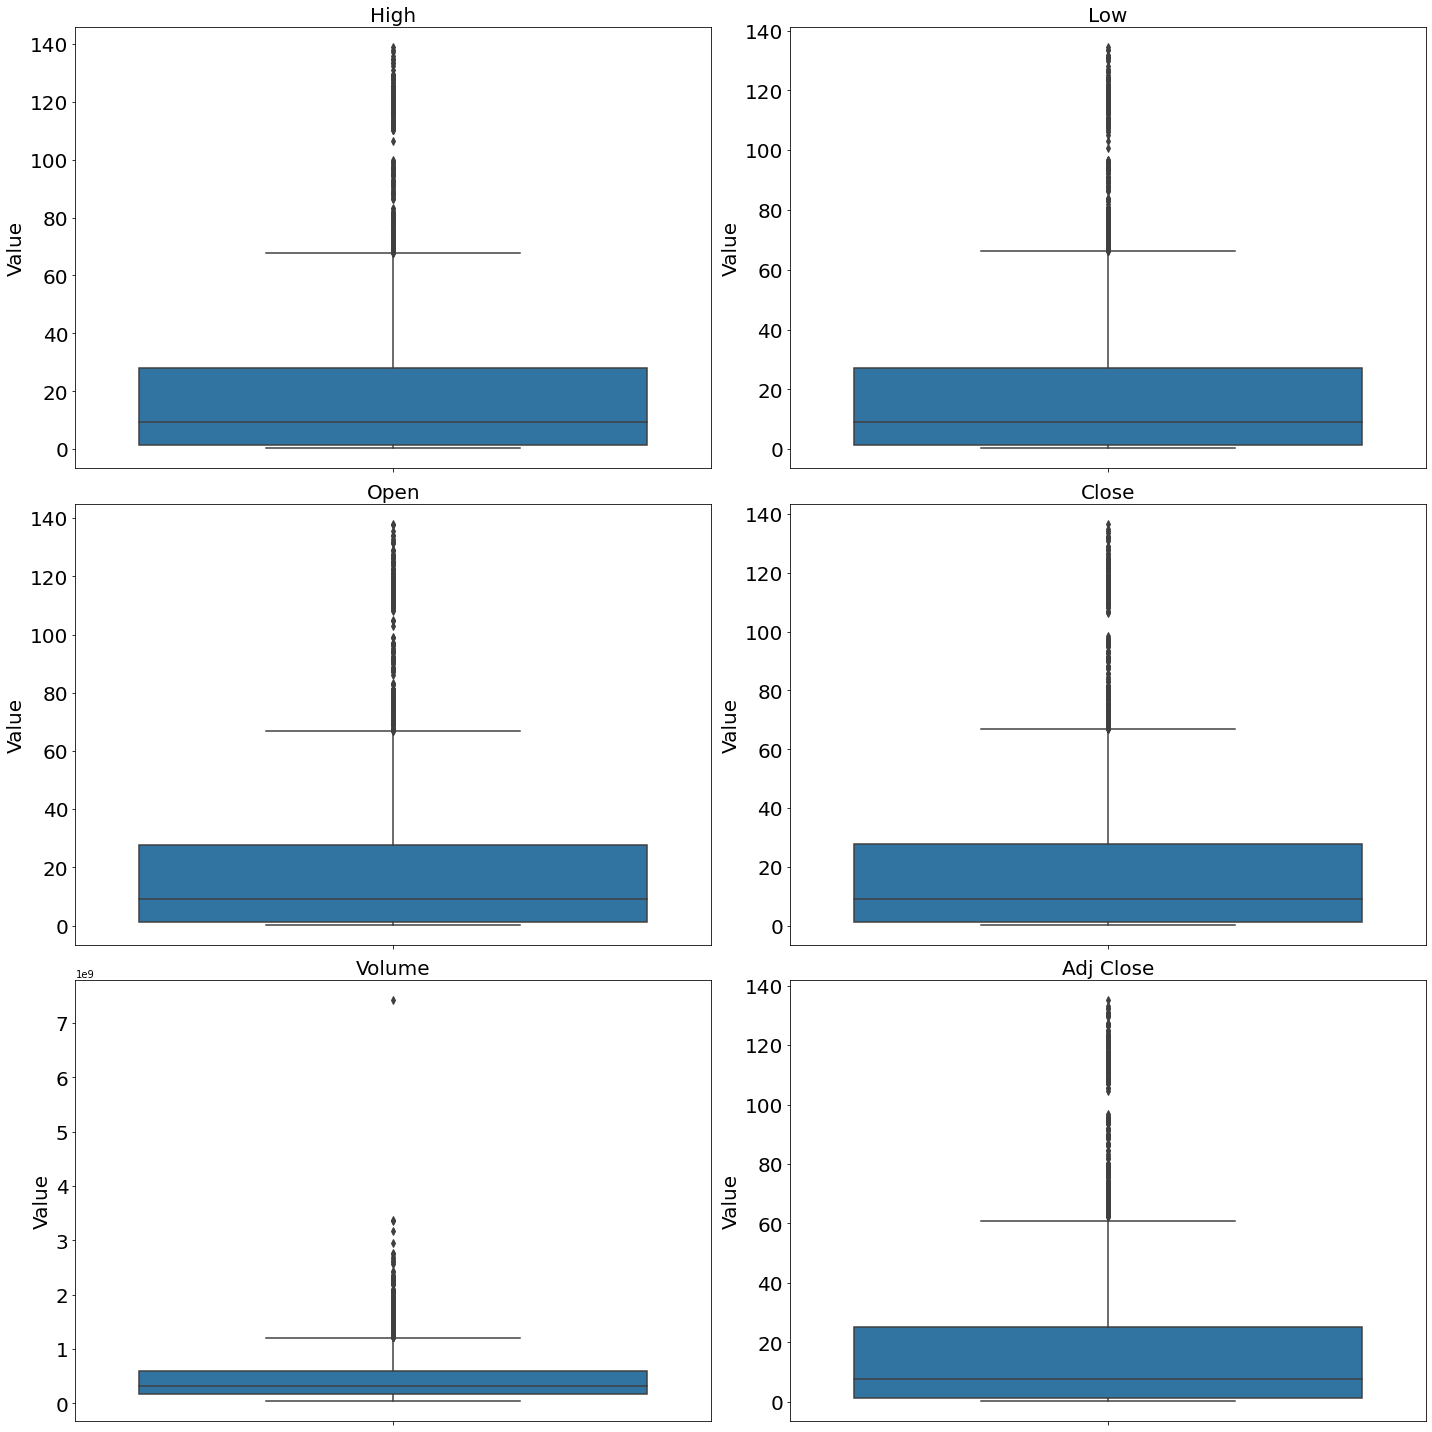

In [10]:
# This function is the same as above, producing subplots for each column but instead plotting a box-plot
plt.subplots(3,2, figsize = (20, 20))

plot_num = 1

for col in apple_df_clean.columns:
    plt.subplot(3,2, plot_num)

    # Plot a histogram of song tempo, with lines marking mean and median
    sns.boxplot(y = apple_df_clean[col]);
    plt.title(col, size = 20)
    plt.ylabel('Value', size = 20)
    plt.yticks(size = 20)
    plot_num += 1

plt.tight_layout()

plt.show()

The box-plot not only further confirms the skew of the data but also indicates values where 50% of the data falls. It can be seen that 50% fall between 0 and around 25. It can also be seen that values above 60 are considered as outliers.

The skewed distribution leads me to choose the MinMaxScaler to scale my data for modelling

<br>

### Looking at the Percentage Change of Apple Stock Price

Another interesting paramter that I will investigate is the percentage change of the price. This is the proportion of change of the price from an original previously selected price and the current one. The previously selected price is a past value which will be determined by means of a lag. A lag of 1 will therefore mean that we are looking at the daily percentage change in price (note that the percentage change calculates on between the 2 prices of the original and the price that falls at the specified lag. The range of valuese in between are not considered). As we are looking at business days I have already determined a few lags to explore:

- lag 1: daily
- lag 5: weekly (5 business days in a week)
- lag 20: weekly (20 business days in 4 weeks which is assumed to be a month)
- lag 60: Quarter (3 months)
- lag 255: 1 year (There are 255 weekdays in a year)
- lag 510: 2 years

These lags represent significant time periods for stocks. Daily and weekly being a standard period. Monthly being significant as it represents seasonality, for example holiday periods, low/high business periods, weather. Quarterly as businesses operate on fiscal quarters of which are accounting periods and for paying dividends. Yearly periods as it is often a period to measure performance. And finally 2 years to represent a longer term period where growth may occur. These lags will actually be determined for the models in a more systematic fashion usings plots and the models themselves. However for now we will use these values.

The percentage change of the stock price is a representation of gains and losses for investors. This is why this calculated metric could be important to investigate in order to gain some insights on apple stocks and it's history.

#### Box-Plot Distribution Plot of Percentage Change

This time I begin with the box-plot and it can be seen that all of the data is fairly normally distributed. It can also be seen below that the perceentage change tends to increase as the lag increases. This is indicating that investors who hold the stock for longer will generally achieve larger gains. The histogram plot can give us a better view of this

Distribution of Percentage Change:



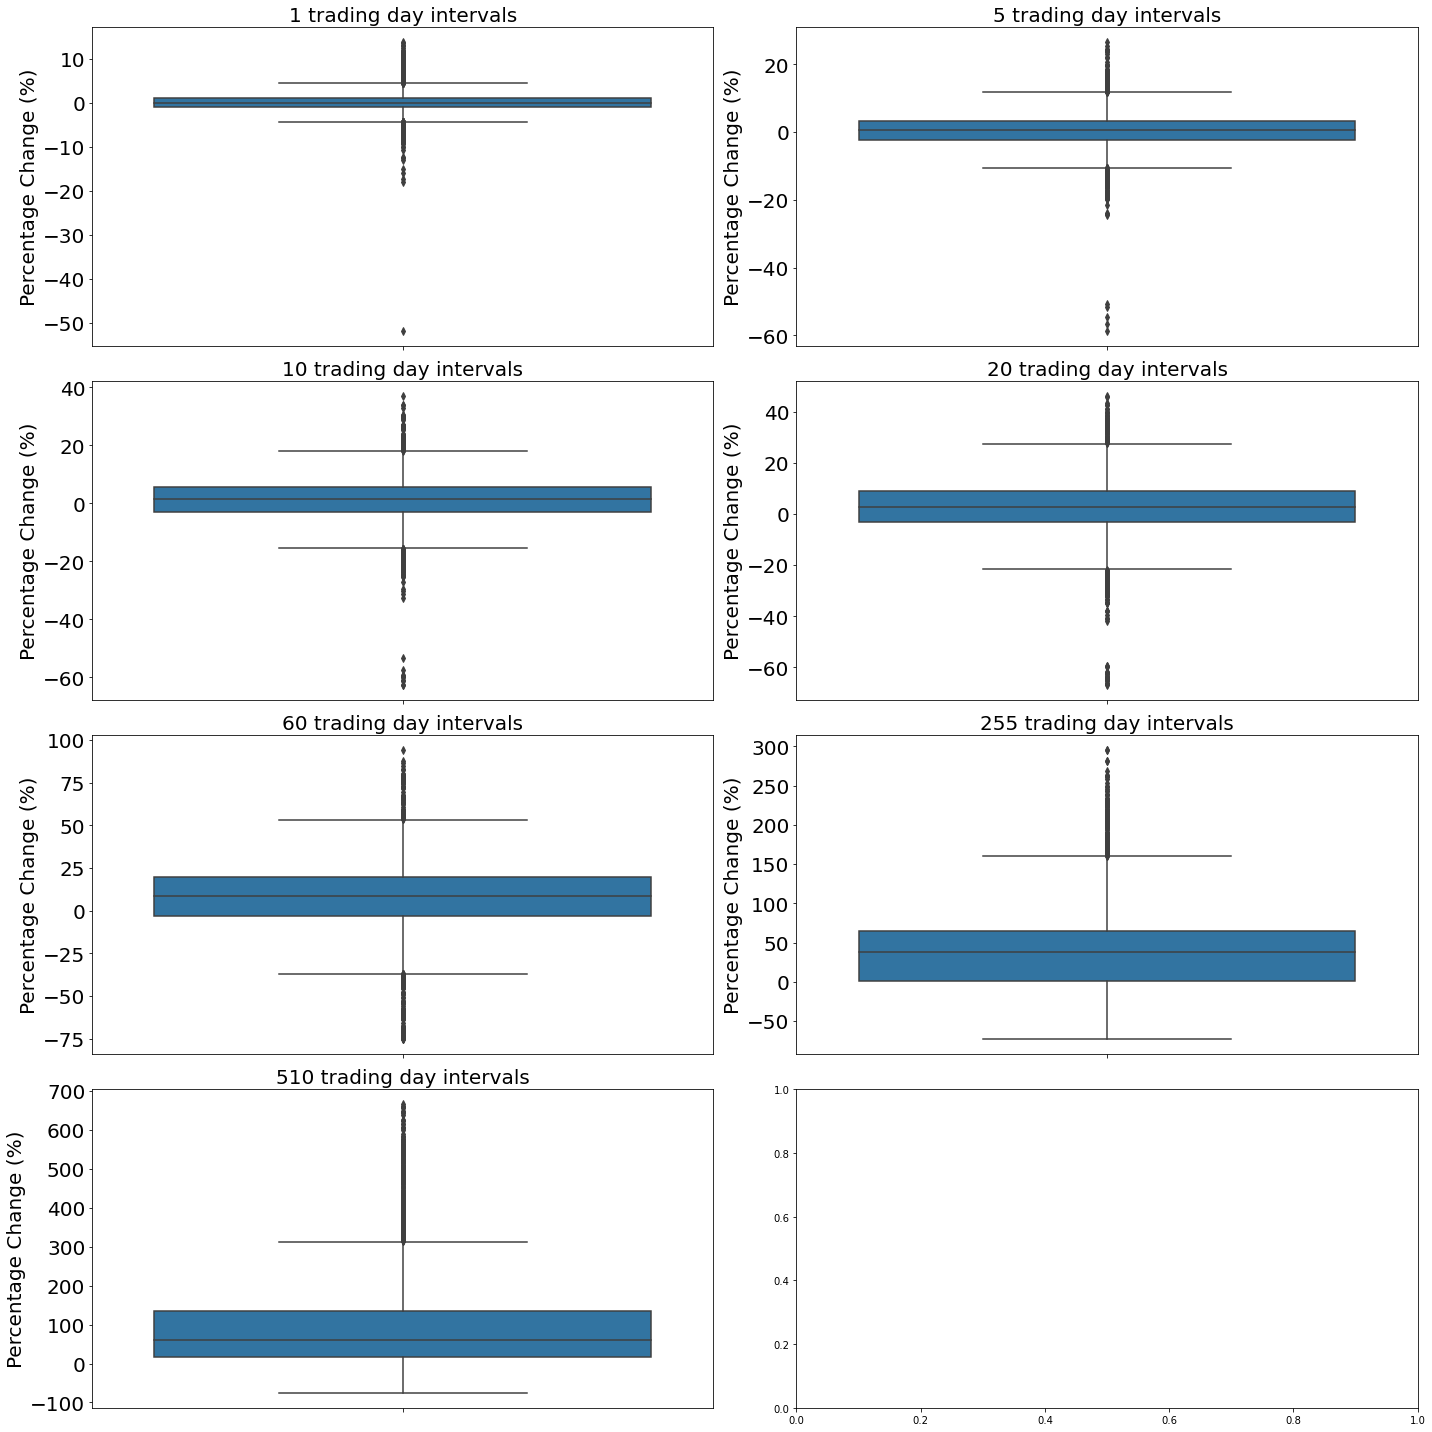

In [11]:
# This function is the same as above in terms of the functions used to create them, producing subplots for each column 
# I have adjusted the structure of the subplots for better visibility
plt.subplots(4,2, figsize = (20, 20))

plot_num = 1

# The for loop used iterates of a list of the ranges I want to find the percentage change of
print('Distribution of Percentage Change:')
print('')

for i in [1, 5, 10, 20, 60, 255, 510]:
    plt.subplot(4, 2, plot_num)
    
# The data is formed by using .pct_change which finds the percentage change between each row value and the value which
# is 'i' periods before it. In this case I is the iterable of the for loop.
    apple_pct_change = apple_df_adjclose.pct_change(periods=i)*100
    
# Naturally the first row in the dataframe will have no values before it and therefore would come up as NaN
# I deal with this by simply removing the NaN value using dropna()
    apple_pct_change.dropna(inplace = True)
    apple_pct_change
    
# Boxplot being plotted and formatted
    sns.boxplot(y = apple_pct_change['Adj Close'])
    plt.title(f'{i} trading day intervals', size = 20)
    plt.ylabel('Percentage Change (%)', size = 20)
    plt.yticks(size = 20)

    plot_num += 1

plt.tight_layout()

plt.show()

#### Histogram Distribution Plot of Percentage Change

The histogram plot has given us a better view of the data. It can be seen that the much smaller lags have a mean of or close to 0. The plots are also normally distributed.

When we look at a daily lag the percentage change ranges between around -10% to +13%. However we can interpret this to expect most values to tend towards the mean which is 0. This is expected as we don't usually see much change on a daily basis.

As we increase the lag it can be seen that both the mean and median tend to increase in value in terms of percentage change. The plots also begin to move towards a positive skew. What is interesting is that although they are both moving in the same direction the mean is increasing at a much quicker rate than the median as the lag increases. This further highlights the presence of outliers (which are particularly large) and demonstrates the possibility of rapid growth occurence. 

Furthermore it is important to note that this could also cement the fact that long term holders have more to gain as longer lags lead to a higher average of percentage gains. That said it would be interesting to see what dates displayed the highest levels of increases before making this conclusion. I will proceed with this by looking at the largest positive values and largest negative values of percentage change and the dates associated with them.

Distribution of Percentage Change:



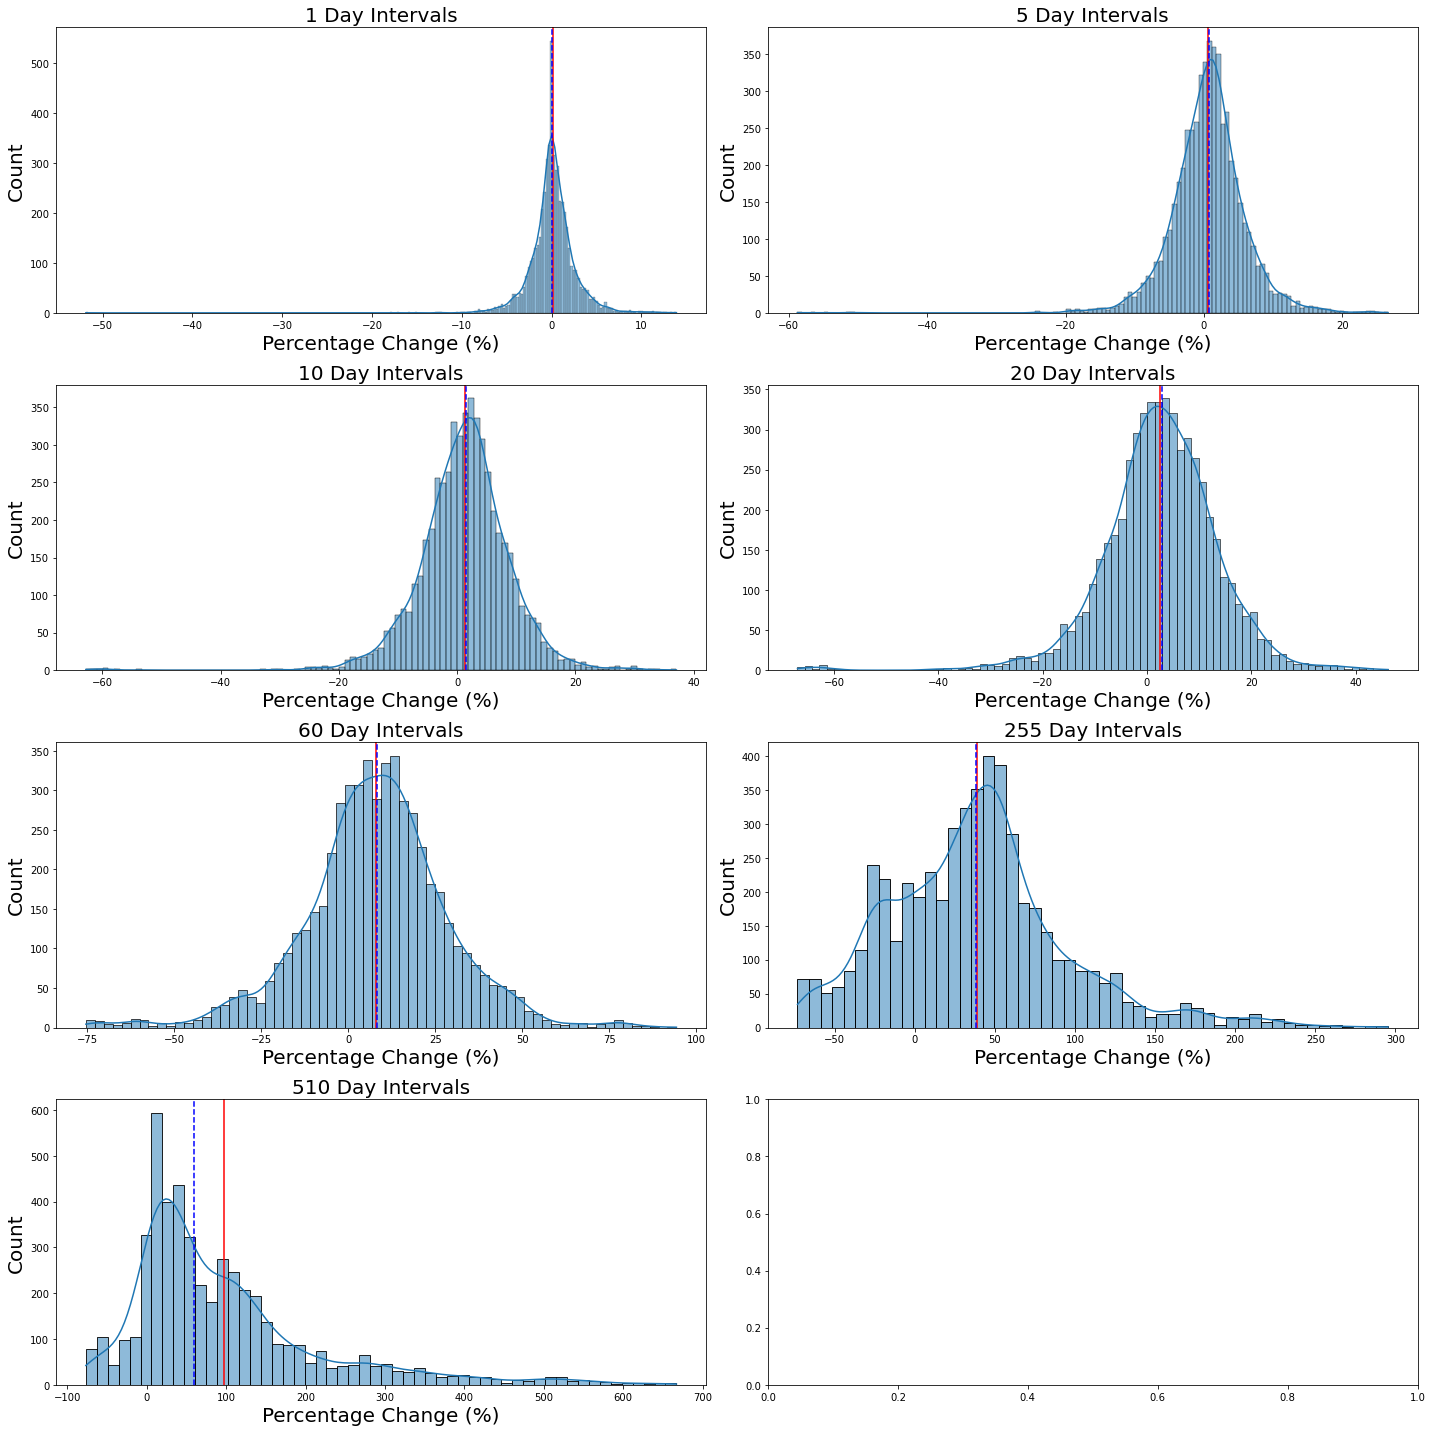

In [12]:
# Same function as above, however using a histplot instead and adding extra lines as I did before
plt.subplots(4,2, figsize = (20, 20))

plot_num = 1


print('Distribution of Percentage Change:')
print('')
for i in [1, 5, 10, 20, 60, 255, 510]:
    apple_pct_change = apple_df_clean['Adj Close'].pct_change(periods=i)*100
    apple_pct_change.dropna(inplace = True)
    apple_pct_change
    
    mean = apple_pct_change.mean()
    median = apple_pct_change.median()
    
    plt.subplot(4, 2, plot_num)
    sns.histplot(x = apple_pct_change, kde = True)
    plt.axvline(mean, label='mean', color = 'red')
    plt.axvline(median, label='median', color = 'blue', linestyle = '--')
    plt.title(f'{i} Day Intervals', size = 20)
    plt.xlabel('Percentage Change (%)', size = 20)
    plt.ylabel('Count', size = 20)

    plot_num += 1

plt.tight_layout()

plt.show()

#### The Top 10 Increases and Decreases of Percentage Change by Adj Close Price

In order to look at the largest positive and neegative values I will first need to remake thee percentage change dataframe and then will create 2 separate dataframes sorted by ascending and descending order. I will then call the head(10) which lists the top 10 rows and append the rows together. This will give me one data frame with 20 rows of the 10 largest positive and 10 largest negative values.

Finally I will proceed with plotting this on a bar chart.

In [13]:
# Creating dataframe of daily percentage change
apple_pct_change = apple_df_adjclose.pct_change(periods=1)*100
apple_pct_change.dropna(inplace = True)
apple_pct_change

,Adj Close
Date,
2000-01-04,-8.430993
2000-01-05,1.463346
2000-01-06,-8.653860
2000-01-07,4.736896
2000-01-10,-1.758800
...,...
2020-12-25,0.000000
2020-12-28,3.576574
2020-12-29,-1.331495


In [14]:
# Here I sort the pct_change data frame in opposite orders and create 2 new variables
pct_sorted_gains = apple_pct_change.sort_values('Adj Close', ascending = False)
pct_sorted_losses = apple_pct_change.sort_values('Adj Close', ascending = True)

In [15]:
# I can also list the minimum and maximum values to look at the range of this
min_pct = min(apple_pct_change['Adj Close'])
max_pct = max(apple_pct_change['Adj Close'])
          
print(f'Largest Percentage Increase {max_pct}')
print(f'Largest Percentage Decrease {min_pct}')

Largest Percentage Increase 13.904894402444468
Largest Percentage Decrease -51.869191780571256


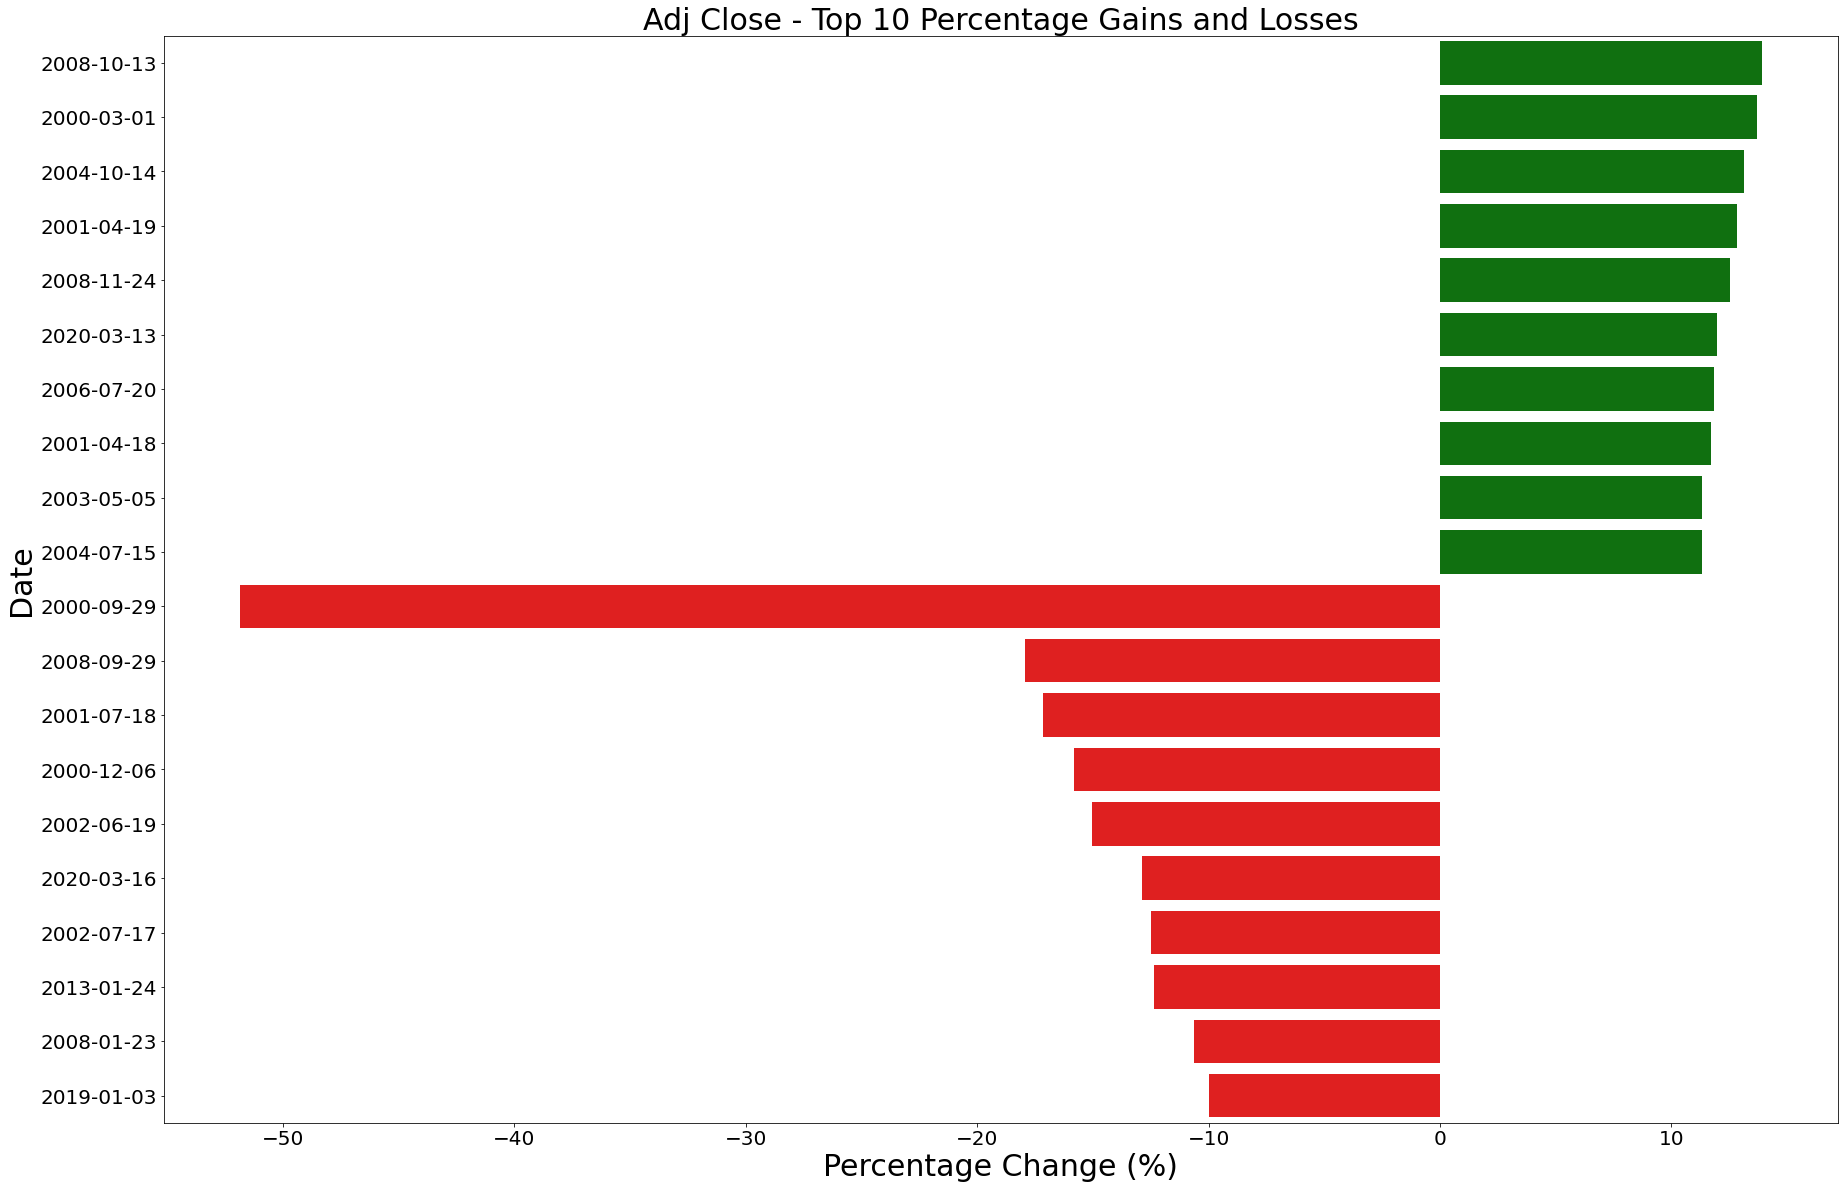

In [16]:
# Below I write a code to generate the plot. First I join the dataframes together
pct_top_bottom = pct_sorted_gains.head(10).append(pct_sorted_losses.head(10))
# I reset the index so that I can change the datetime column to just the date
pct_top_bottom.reset_index(inplace=True)
pct_top_bottom['Date'] = pd.to_datetime(pct_top_bottom['Date']).dt.date
# I finally sort these values
pct_top_bottom.sort_values('Adj Close', ascending = True)


# Before plotting I have created a color filter which creates a list of the colors for each value in order of the 
# rows of the combined dataframe.
cmap = ['green' if i>0 else 'red' for i in pct_top_bottom['Adj Close']]

#I then plot the barchart and input the cmap into the barplot parameters and finally format the barchart as required
plt.figure(figsize = (30,20))
sns.barplot(y = pct_top_bottom['Date'], x = pct_top_bottom['Adj Close'], palette = cmap)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel('Percentage Change (%)', size = 30)
plt.ylabel('Date', size = 30)
plt.title('Adj Close - Top 10 Percentage Gains and Losses', size = 30)
plt.show()

The barchart above interestingly shows the largest negative value to occur in september 2000 and the largest positive change to occur in October 2008. This potentially conntradicts my previous statement however we must remember that this is just one value for one date. 

Here most of the earlier years before 2010 have shown the largest values in percentage changes in general. One piece of research informed me that the tech bubble burst in 2000 caused Apple's stock price to plunge by nearly 50% on Sept. 29, 2000, after warning that quarterly earnings would fall far short of expectations (https://www.latimes.com/archives/blogs/money-company/story/2011-08-24/apple-stock-from-6-56-to-403-in-about-8-years#:~:text=The%20stock%20then%20crashed%20as,fall%20far%20short%20of%20expectations). 

In the case of 2008, high volatility could have led to the stock being oversold due to the crash, thus leading to a large buyback over a short period. The last great recession happened between 2007 and 2008 so it is expected that in this year prices had significantly fallen. We can investigate this further later on by grouping by year. First let's have a look at the same plots over different periods for the percentage difference.

Below I create a helper function for plotting multiple plots of different periods

In [17]:
def pct_bar_plot(df_adjclose, period, figsize = None):
    
    '''This function creates a bar plot where psitive values will be colored green and negative values red.
    It is to be used on a stock price time series dataset with a column called 'Adj Close'. This function allows
    us to plot these bar plots quickly with varying periods and will be used in conjunction with a for loop to plot
    multiple periods at once.
    
    df_adjclose: This is the dataframe which contains the 'Adj Close' column and with a datetime index
    period: This is the period selected to calulcate percentage change. It cannot exceed the size of 1-len(dataset)
    figsize: This parameter is optional if you do not use this function for multiple plots. It can be set by typing
    'plt.figure(figsize = (x,y))' where x and y are the height and width of the figure.
    '''
    
    df_pct_change = df_adjclose.pct_change(periods=period)*100
    df_pct_change.dropna(inplace = True)
    pct_sorted_gains = df_pct_change.sort_values('Adj Close', ascending = False)
    pct_sorted_losses = df_pct_change.sort_values('Adj Close', ascending = True)
    
    pct_top_bottom = pct_sorted_gains.head(10).append(pct_sorted_losses.head(10))
    pct_top_bottom.reset_index(inplace=True)
    pct_top_bottom['Date'] = pd.to_datetime(pct_top_bottom['Date']).dt.date
    pct_top_bottom.sort_values('Adj Close', ascending = True)
    
    figsize
    cmap = ['green' if i>0 else 'red' for i in pct_top_bottom['Adj Close']]
    sns.barplot(y = pct_top_bottom['Date'], x = pct_top_bottom['Adj Close'], palette = cmap)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlabel('Percentage Change (%)', size = 30)
    plt.ylabel('Date', size = 30)
    plt.title(f'Adj Close - Top 10 Percentage Gains and Losses from {period} Business Days Before', size = 30)

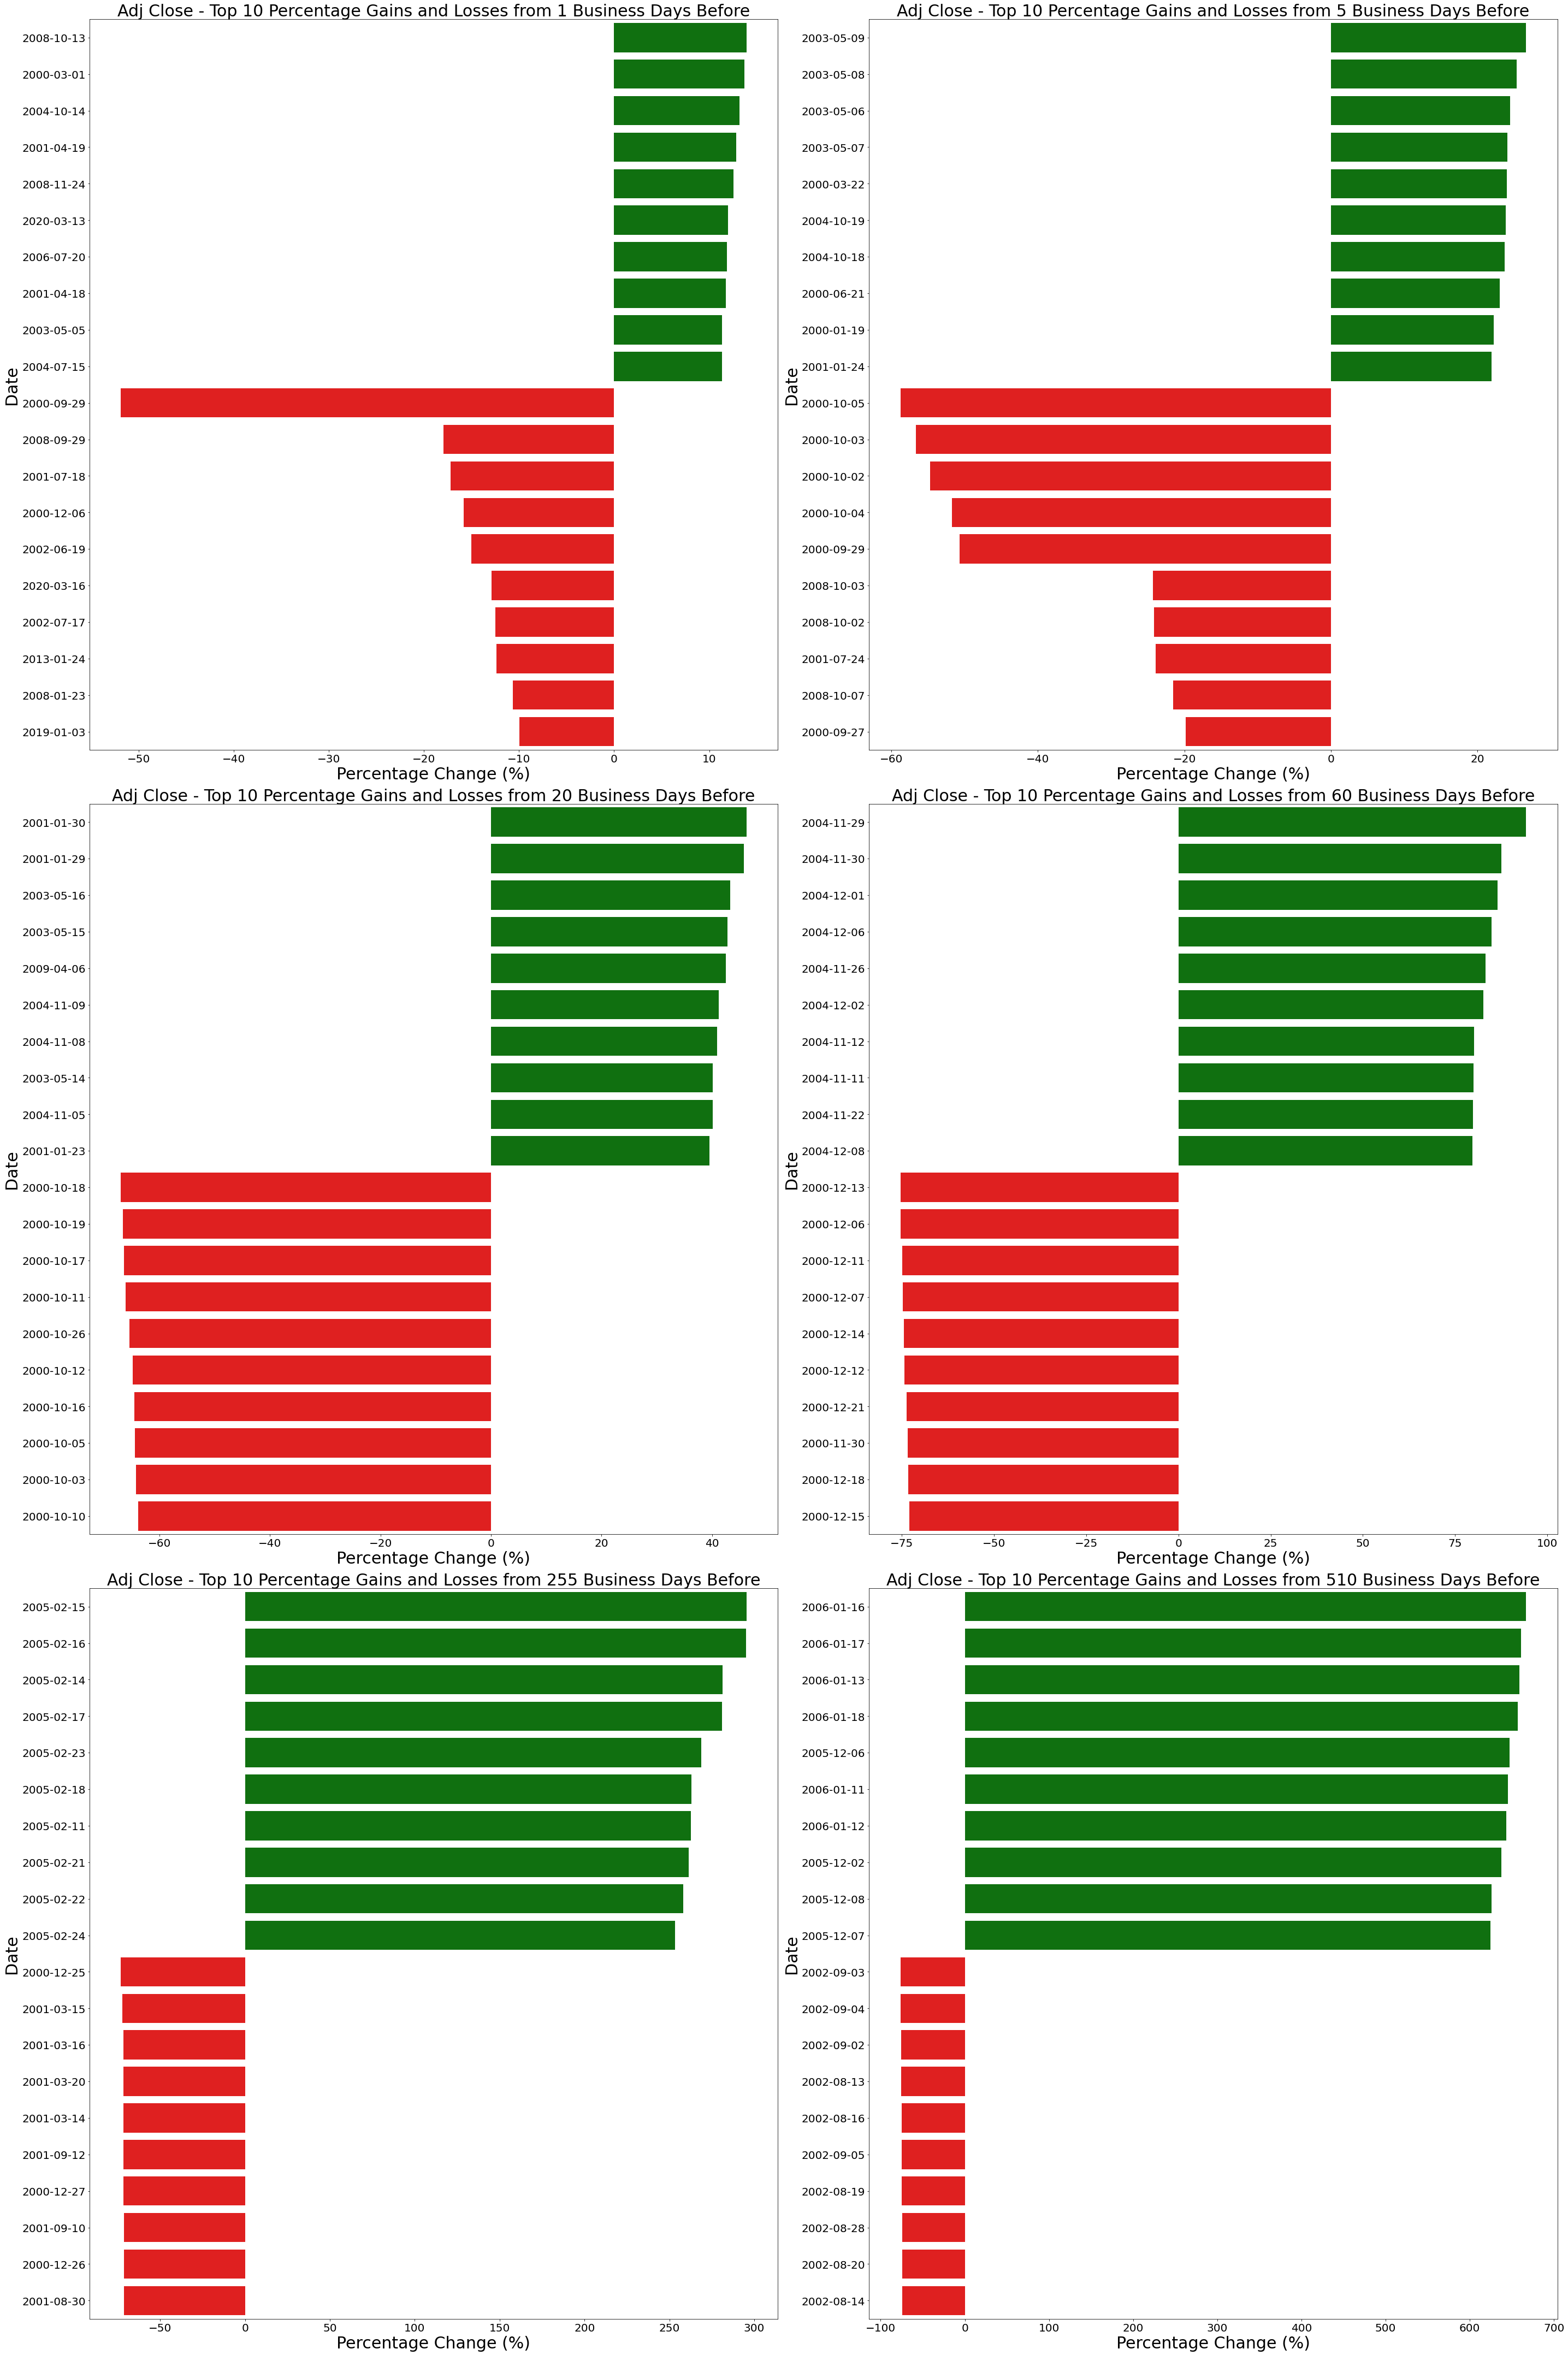

In [18]:
# I use the helper function to plot subplots for each of the lags I mentioned previously. This is by use of a for loop
# which iterates through each period in the list and sets it as the period inside the function.
plt.subplots(3,2, figsize = (40,60))
counter = 1
for i in [1,5,20,60,255,510]:
    plt.subplot(3,2,counter)
    pct_bar_plot(apple_df_adjclose, period = i)
    counter+=1
plt.tight_layout()
plt.show()

The first thing we can see from these plots is that despite the increase in period the dominant years for largest increase and decreases were moostly before 2010. However there seems to be 4 key years we observe. The years 2000, 2001 for largest negative percentage changes and the years 2005 and 2006 for the largest positive percentage changes. 2000 can be explained by the tech crash and we begin to see the prominence of these years once the periods are going into monthly percentage change and above.

At first glance this is quite significant but again there is a realisation that this may not be very representative as we can see that many of these top/bottom 10 values are displaying the same month and year but just a different day of that moonth, many of which are back to back days. We can however lok at these dates and compare it back with the daily percentage change to see if the month year appears which could indicate a significant day of gain and loss. 29/09/2001 is one such example. 

Another method we could use is to look at the total sum of percentage change over each year as mentioned earlier. I can do this by simply resampling the dataframe to years and then running a similar plot.

<br>

#### Yearly Sum of Percentage Change by Adj Close Price

As we are working with percentages an average value of percentage would not be appropriate to compare percentage difference between years. The sum of percentage differences would be a better representation. This value would be considered the sum of daily percentage changs in a single year. This is what I am interested in rather than year on year percentage change. 

What this essentially explains is the general performance of the stock in that year as it looks at gains and losses on a daily basis. On the other hand looking at a single day and comparing it to the same day the previous year would be incorrect as we may encounter an outlier on either of those years. Another technique could be looking at year on year percentage change based on the average stock price of each year, but again any particular year could be heavily riddled with outliers or be extremely skewed which isn't representative of the potential to make gains or losses.

I do this by first resampling the original daily percentage change to years essentially grouping it by year and using sum as the agregation. I can then apply the previous plot to this data.

In [19]:
# Resampling allows us to grouby by year and I have agregated by sum
apple_pct_change_yearlysum = apple_pct_change.resample('Y').sum()

apple_pct_change_yearlysum

,Adj Close
Date,
2000-12-31,-86.767102
2001-12-31,57.760480
2002-12-31,-30.551605
2003-12-31,46.793401
2004-12-31,118.497084
2005-12-31,87.947547
2006-12-31,23.832347
2007-12-31,91.965775
2008-12-31,-66.939681


Text(0.5, 1.0, 'Yearly Sum of Daily Percentage Change')

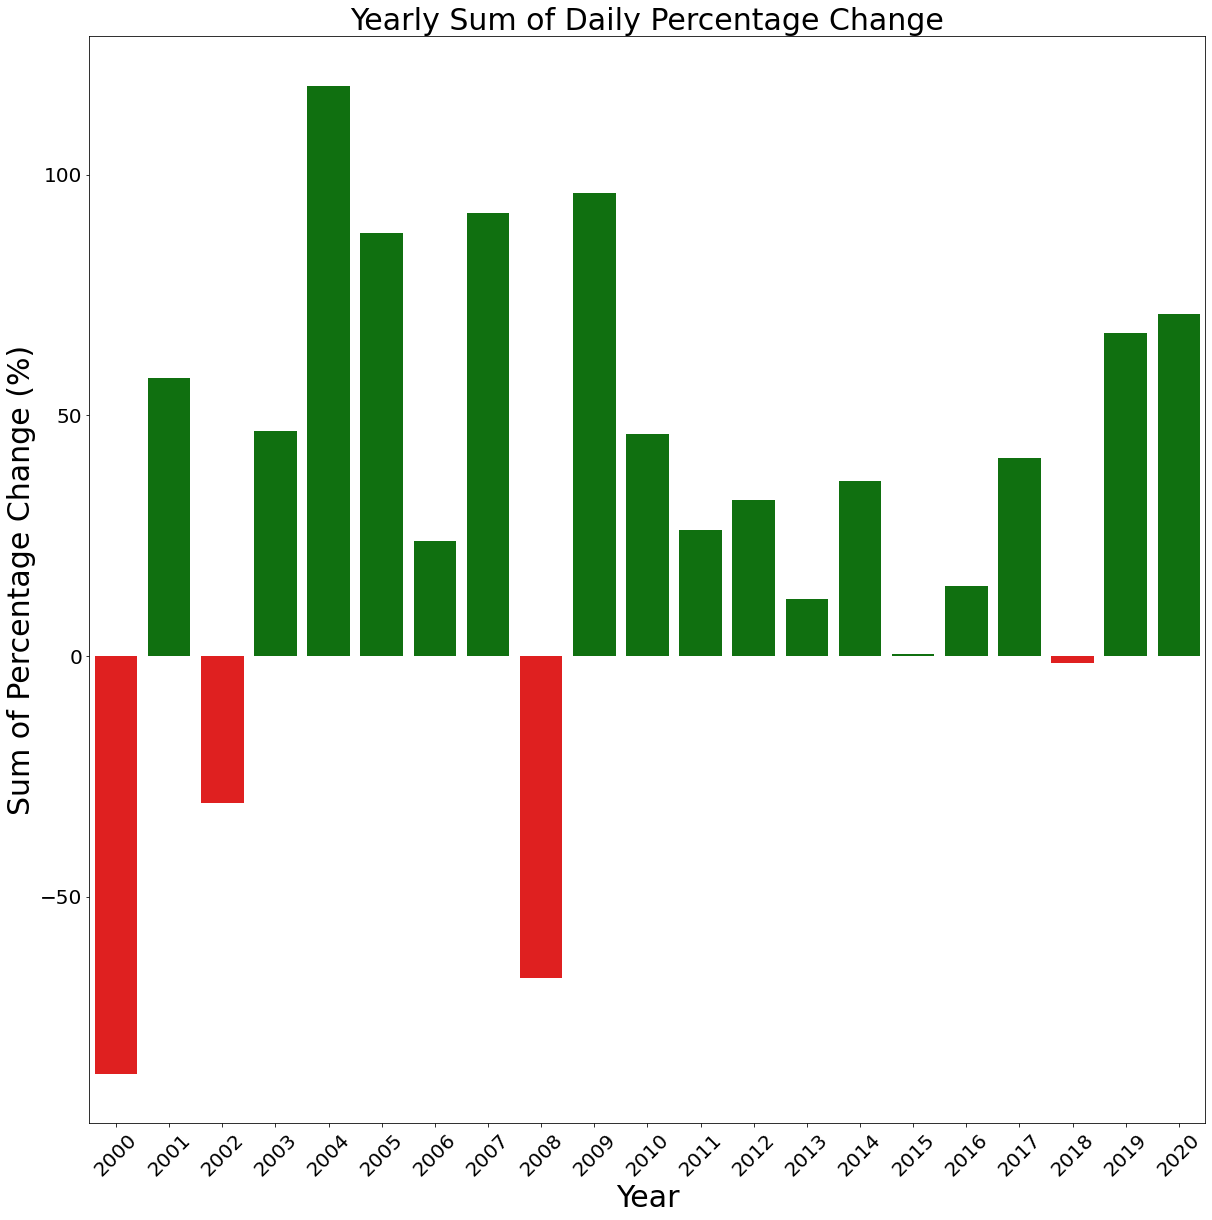

In [20]:
# A similar plot to the eabove plots

cmap = ['green' if i>0 else 'red' for i in apple_pct_change_yearlysum['Adj Close']]
plt.figure(figsize= (20,20))
sns.barplot(x = apple_pct_change_yearlysum.index.year, y = apple_pct_change_yearlysum['Adj Close'], palette = cmap)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Sum of Percentage Change (%)', size = 30)
plt.xlabel('Year', size = 30)
plt.xticks(rotation = 45)
plt.title('Yearly Sum of Daily Percentage Change', size = 30)

The plot confirms that the year 2000 was a rainy year for Apple stocks. 2008 shows the second highest losses which is expected due to the recession. What we are noticing the most is that the most growth occured in the earlier years in the 2000's. 

The scale of the Adj Close Price plot is indeed misleading as at first it seems we are witnessing exponential growth however looking closer there are 4 years between 2016 and 2020 where we have seen the price grow from around 20 to 130 which is a 650% increase. Conversely in the earlier years the stock price was groowing from 0.99 so the gains made were much larger over a similar period.

Next I will examine the trends within the data with the use of moving averages and moving variance.

<br>
<br>
<br>

## Trends in the Closing Price

I will explore the trends in apple stock price by looking at moving averages and exponential moving averages. I will do this by using .rolling() and .ewm() to apply this to the close price and create new columns.

### Simple and Exponential Moving Averages

The simple moving average is simply the average of all the values over the specified window and gives equal weighting to. Exponential moving average however gives more weight to recent values than values further away. α determines how the value is weighted and specifically the decay of it. I will be using span for my exponential average which defines alpha as α=2/(span+1) where span is the distance from the point. In the code, we will need to define span as the total amount of lag of which we will be using the values [5,10,20,60,255].

In [21]:
# First I define the a list of windows/lags
windows = [5, 10, 20, 60, 255]


# I will be looking to creat 2 new dataframes
# First I create a copy of the original close price dataframe 
apple_df_adjclose_sma = apple_df_adjclose.copy()

# I then use a for loop to create a new column for each window, iterting through the list of the windows
for i in windows:
    apple_df_adjclose_sma[f'Adj_Close_SMA{i}'] = apple_df_adjclose['Adj Close'].rolling(window=i).mean()

# Once these columns are created I drop the NaN values and drop the original price column to leave me with the SMA
apple_df_adjclose_sma.dropna(inplace=True)
apple_df_adjclose_sma.drop(columns = 'Adj Close', inplace=True)
display(apple_df_adjclose_sma)



# I do the same as above but use ewm to create an exponential moving average
apple_df_adjclose_ema = apple_df_adjclose.copy()
for i in windows:
    apple_df_adjclose_ema[f'Adj_Close_EMA{i}'] = apple_df_adjclose['Adj Close'].ewm(span=i, min_periods = i).mean()

apple_df_adjclose_ema.dropna(inplace=True)
apple_df_adjclose_ema.drop(columns = 'Adj Close', inplace=True)
apple_df_adjclose_ema
    


,Adj_Close_SMA5,Adj_Close_SMA10,Adj_Close_SMA20,Adj_Close_SMA60,Adj_Close_SMA255
Date,,,,,
2000-12-22,0.218242,0.221857,0.236674,0.284591,0.704613
2000-12-25,0.220525,0.221572,0.233868,0.282244,0.702167
2000-12-26,0.222618,0.220525,0.231323,0.280310,0.699985
2000-12-27,0.223950,0.220240,0.229230,0.278074,0.697765
2000-12-28,0.226233,0.220810,0.227946,0.276235,0.695814
...,...,...,...,...,...
2020-12-25,129.448064,127.256370,124.181284,118.138893,93.486234
2020-12-28,131.119998,128.729685,125.052823,118.474706,93.727967
2020-12-29,131.710904,129.420393,125.653116,118.835456,93.964001


,Adj_Close_EMA5,Adj_Close_EMA10,Adj_Close_EMA20,Adj_Close_EMA60,Adj_Close_EMA255
Date,,,,,
2000-12-22,0.220818,0.224081,0.238206,0.338819,0.588363
2000-12-25,0.223320,0.224853,0.237265,0.335196,0.585114
2000-12-26,0.223404,0.224619,0.235961,0.331535,0.581856
2000-12-27,0.224093,0.224774,0.234962,0.328057,0.578647
2000-12-28,0.224553,0.224901,0.234058,0.324693,0.575472
...,...,...,...,...,...
2020-12-25,129.300372,127.482711,124.671635,118.919215,97.388410
2020-12-28,131.223116,128.861964,125.661823,119.448704,97.682786
2020-12-29,131.905468,129.663457,126.386427,119.901866,97.960813


Once I created these dataframes I will be plotting each of the SMA and EMA with the same lags alongside the original price. I have first plotted below, the monthly averages and it's clear that it is very difficult to visualise as it spans accross 10 years. The monthly averages appear to follow the line exactly. Instead I will plot and look at the last 2 years.

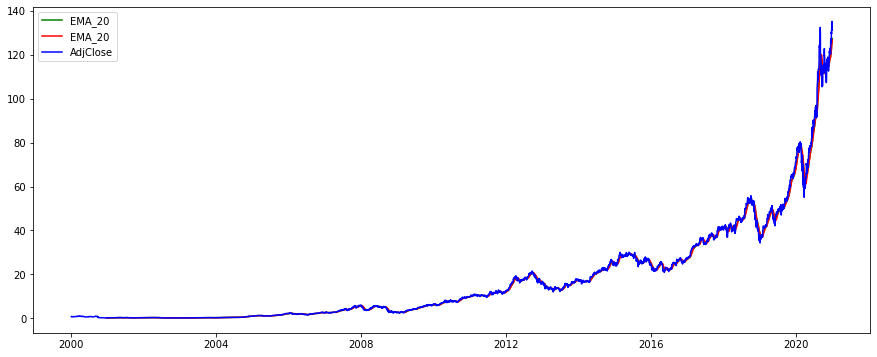

In [35]:
plt.figure(figsize=(15,6))
plt.plot(apple_df_adjclose_ema['Adj_Close_EMA20'], color = 'green', linestyle = '-', label = 'EMA_20')
plt.plot(apple_df_adjclose_sma['Adj_Close_SMA20'], color = 'red', linestyle = '-', label = 'EMA_20')
plt.plot(apple_df_clean['Adj Close'], color = 'blue', label = 'AdjClose')
plt.legend()
plt.show()

By using a for loop and regex I am plotting everything at once

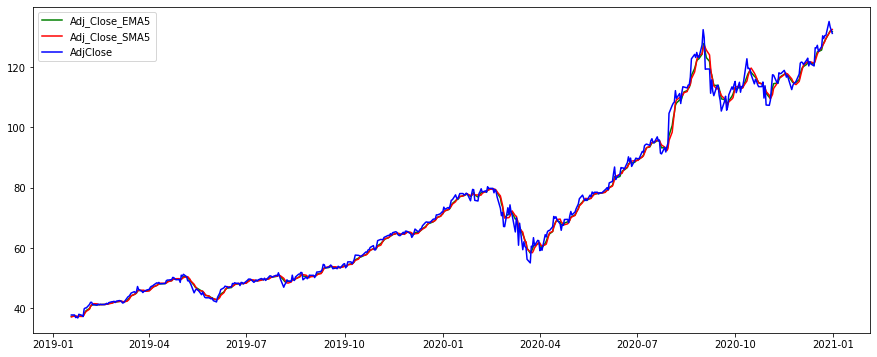

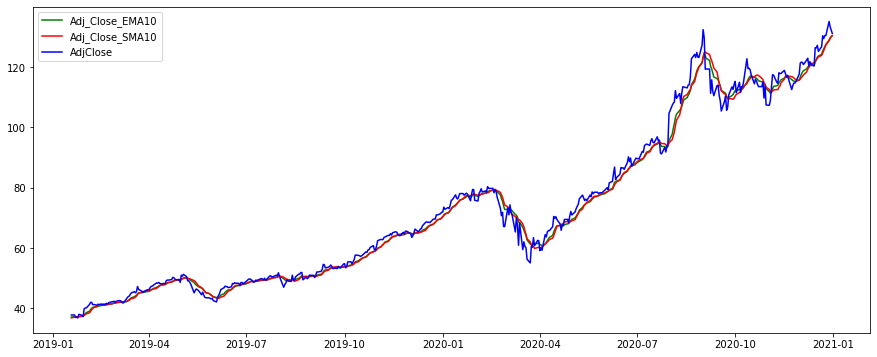

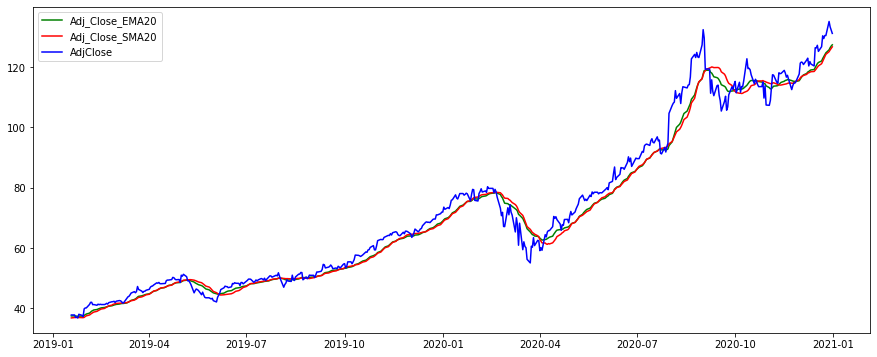

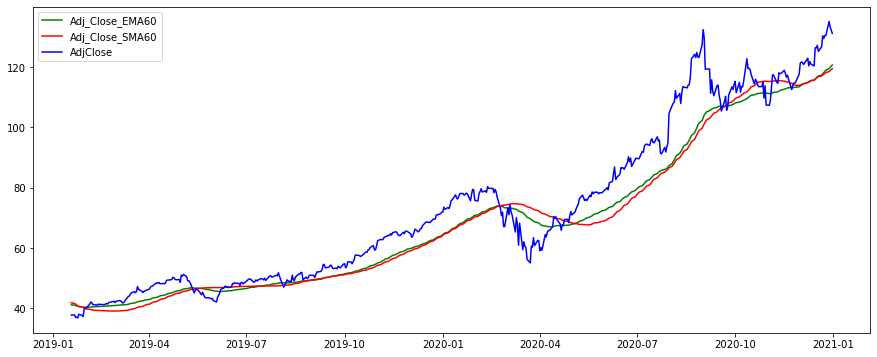

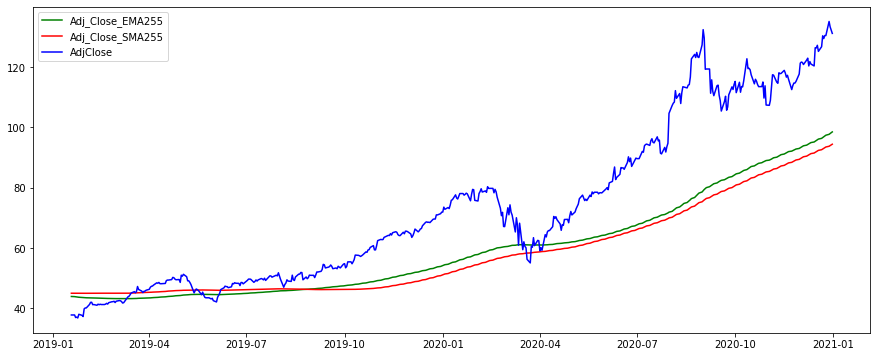

In [36]:
# importing regex library
import re

# Nested for loop to iterate through the sma dataframe and then the ema dataframe
# The for loop begins with iterating on the first element in the sma columns and runs through the code for every
# ema clumn following that. I. use regex to extract the number from the column name and check if this matches
# Non matches are passed on the EMA column and it then iterates through the next element in the ema columns list
# If the numbers in the column match it plots the EMA, it then plots the SMA and ADJ close as well

for i in apple_df_adjclose_sma.columns:
    plt.figure(figsize=(15,6))
    for j in apple_df_adjclose_ema.columns:      
        if re.findall(r'\d+', i) == re.findall(r'\d+', j):
            plt.plot(apple_df_adjclose_ema[j][-510:], color = 'green', linestyle = '-', label = j)
        else:
            pass
    plt.plot(apple_df_adjclose_sma[i][-510:], color = 'red', linestyle = '-', label = i)
    plt.plot(apple_df_clean['Adj Close'][-510:], color = 'blue', label = 'AdjClose')
    plt.legend()
    plt.show()

<br>

The moving averages show the general upwards trend of the apple stock price. It can be seen that the EMA is generally closer to the actual price than the SMA. This smoothing has allowed us to observe that there seems to be some kind fluctuating trend. 

Looking at the first 2 lags May of 2019 and March of 2020 show a similar movement in price. This is almost a year and could potentially indicate a yearly seasonal trend. That said overall we can firmly conclude that the apple price has a long term upwards treen by looking at the yearly averages.

### Moving Variance

The variance is the mean squared difference between each data point and the centre of the distribution measured by the mean. It is a measure of the dispersion of a dataset that takes into account the spread of all of the data points. It is simply the square of the standard deviation.

By looking at the variance we can interpret the level of volatiliy of stock prices. Variance is much easier to visualise as the standard deviation is often very small and close to 0 when there is little volatility. I will be exploring the moving variance across the different lags previously used for the moving averages and investigate points of interest.

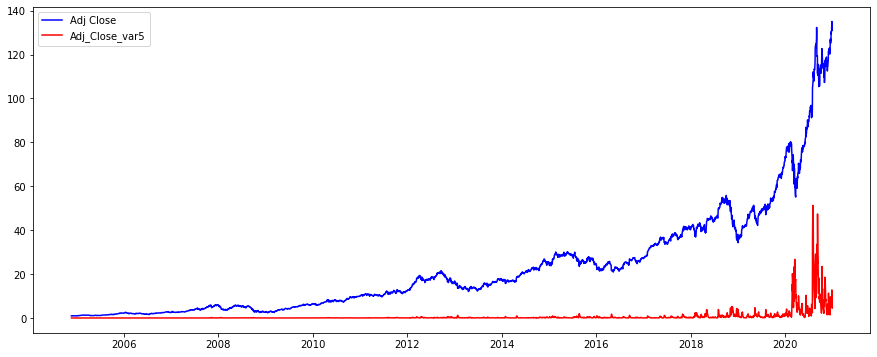

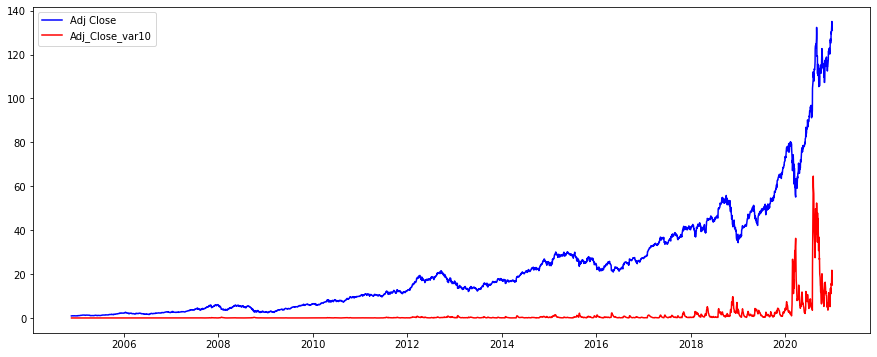

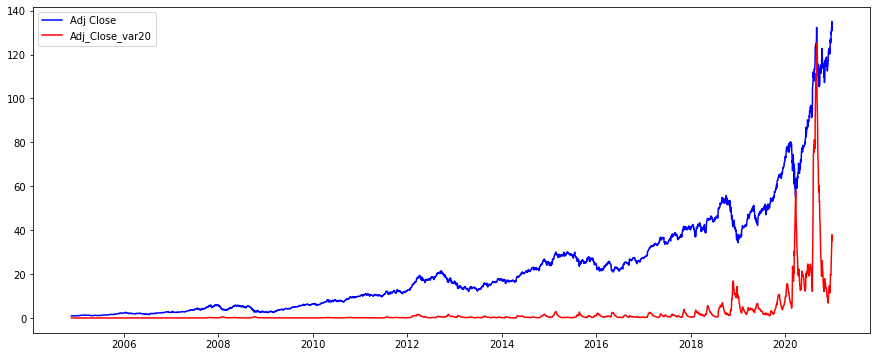

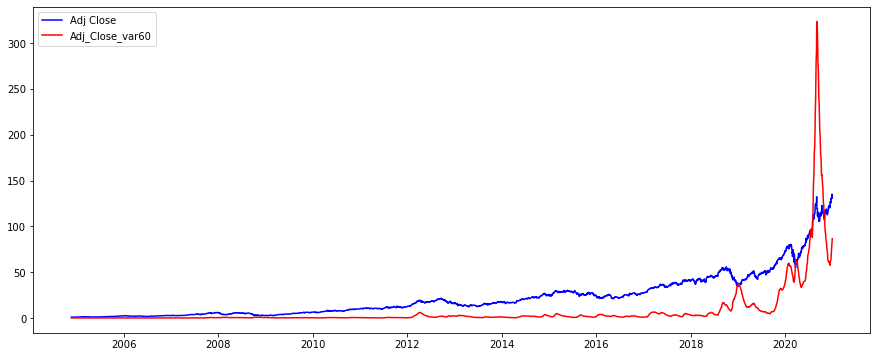

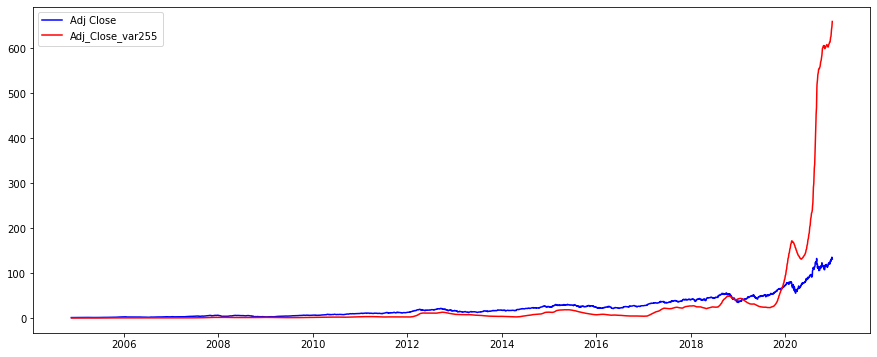

In [23]:
# Same as previous charts but using rolling variance
windows = [5, 10, 20, 60, 255]
apple_df_adjclose_var = apple_df_adjclose.copy()
for i in windows:
    apple_df_adjclose_var[f'Adj_Close_var{i}'] = apple_df_adjclose['Adj Close'].ewm(span=i).var()
        

apple_df_adjclose_var.dropna(inplace=True)
apple_df_adjclose_var.drop(columns = 'Adj Close', inplace=True)
apple_df_adjclose_var


for i in apple_df_adjclose_var.columns:

    plt.figure(figsize=(15,6))
    plt.plot(apple_df_clean['Adj Close'][1275:], color = 'blue', label = 'Adj Close') 
    plt.plot(apple_df_adjclose_var[i][1275:], color = 'red', linestyle = '-', label = i) 
    plt.legend()
    plt.show()

The first observation from all of the plots show that we see the variance increasing significantly from 2020. We see smaller spikes prior to this from 2016 onwards and before this year the variance is relatively stable and close to 0. This indicates that in 2020 the stock price has been the most volatile it has ever been. Apple has particularly shown consistent growth throughout the 2000's and continues to do so but with much greater variability.

The plots from a 60 rolling window and under demonstrate best the dispersion of the price on given days. This increase is also another indicator that the data is not stationary as we are not seeing a constant variance.

Below I have plotted the difference between daily high and low price (High-Low) which represents the range at which the apple stock price has moved between in a given day. A higher range would suggest that the price is more volatile and comparing this to the moving variance plot, we can see that there are similarities between the peaks and troughs of these plots. 

Previously we observed that the earlier years displayed the largest percentagee changes as well as growth, however we haven't seene much change in the variance. This could bee due to the fact that despite the percentage increases and decreases the valuee of the stock was significantly lower and therefore naturally the variance would also be small. Furthermore we are seeing much sharper falls in the latest years over short periods of time comapred to earlier years.

Text(0.5, 1.0, 'Daily High and Low Price Difference')

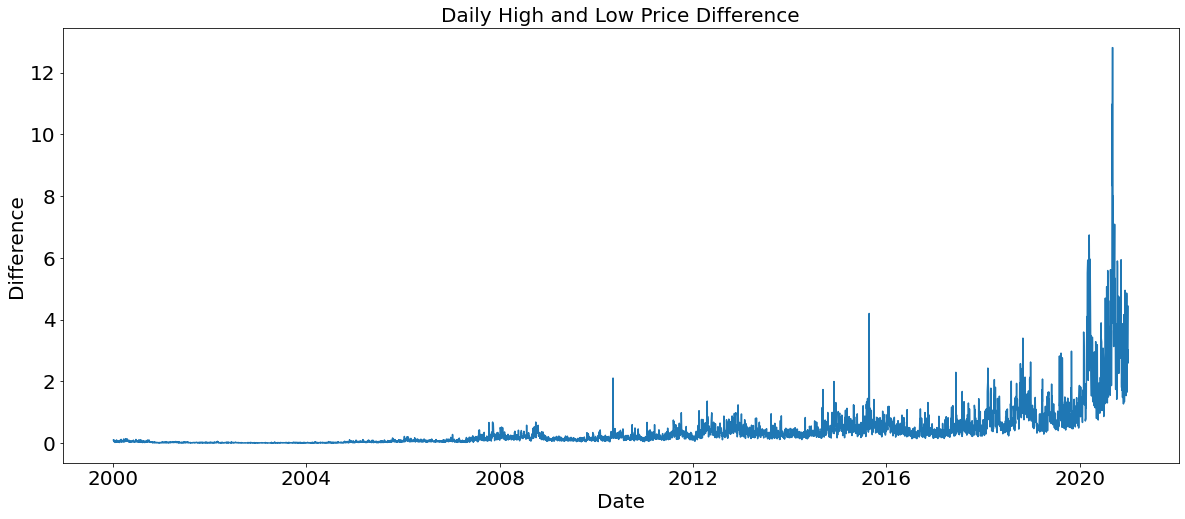

In [24]:
# Creating new column for High price - Low price to see the range in which price has moved in one day
apple_df_clean['High-Low'] = apple_df_clean['High'] - apple_df_clean['Low']
plt.figure(figsize= (20,8))
plt.plot(apple_df_clean['High-Low'])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Difference', size = 20)
plt.xlabel('Date', size = 20)
plt.title('Daily High and Low Price Difference', size = 20)

<br>
<br>
<br>

## Stationarity

Stationarity is an important factor in time series analysis with huge influence on how the data is perceived and predicted. Most time series models go by the assumptrion that each point is independent of one another.

Particulary, a non-stationary dataset has statistical properties such as mean and variance which do not change over time. In other words they are relatively constant throughout the dataset. This is the primary indicator of a non-stationary dataset. Time series data that do not show trends or seasonality can be considered stationary, however at this point we can already determine that the apple stock price data is not stationary, having looked at the moving averages and variances.

Nonetheless I will quickly take a look at the mean and standard deviations on a plot as well as run a statistical test called Augmented Dickey-Fuller test which can check for stationarity.

### Visualising the Roling Mean and Rolling Standard Deviation

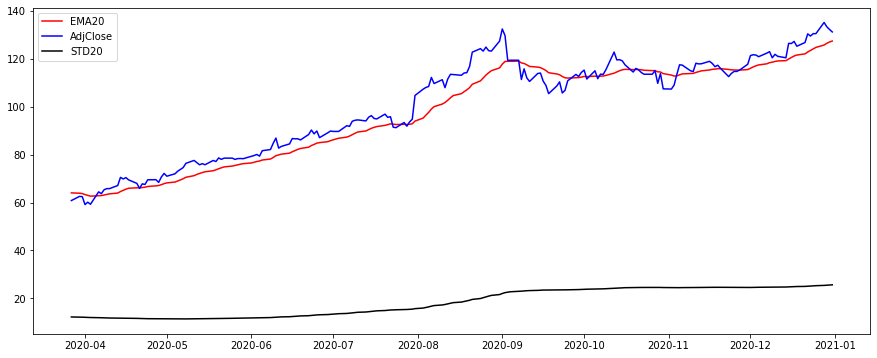

In [25]:
# Plot of rolling mean, rolling standard deviation (with windws of 20) and adj close price, to visualise this
# Non-stationarity
apple_df_adjclose_std = apple_df_adjclose.copy()
for i in windows:
    apple_df_adjclose_std[f'Adj_Close_STD20'] = apple_df_adjclose['Adj Close'].ewm(span=i).std()

apple_df_adjclose_std.dropna(inplace=True)
apple_df_adjclose_std.drop(columns = 'Adj Close', inplace=True)
apple_df_adjclose_std

plt.figure(figsize=(15,6))
plt.plot(apple_df_adjclose_ema['Adj_Close_EMA20'][-200:], color = 'red', linestyle = '-', label = 'EMA20')
plt.plot(apple_df_clean['Adj Close'][-200:], color = 'blue', label = 'AdjClose')
plt.plot(apple_df_adjclose_std['Adj_Close_STD20'][-200:], color = 'black', linestyle = '-', label = 'STD20')
plt.legend()
plt.show()

It is clear that both themean and standard deviation are not constant both displaying an upwards trend. As previously mentioned, there seems to be an element of seasonality in this data which will be explored further in my models.

<br>

### The Augmented Dickey-Fuller test (ADF)

The ADF test is a unit root test. Unit root tests specifically test for stationarity. The null hypothesis of the ADF test is that the time series is not stationary. I will run this test on 3 different windows and will be looking to evaluate the p-value of this test. A resulting p-value which is greater than the significance level (0,05) will cause us to fail to reject the null hypothesis.

In [26]:
# printing the params for the ADF test
from statsmodels.tsa.stattools import adfuller
adjclose_ADFT = adfuller(apple_df_adjclose['Adj Close'])
print('Monthly Simple Moving Average - Augmented Dickey-Fuller test:')
print('')
print(f'ADF Statistic: {adjclose_ADFT[0]}')
print(f'p-value: {adjclose_ADFT[1]}')
print('Critical Values:')
for key, value in adjclose_ADFT[4].items():
    print(f'{key}: {value}')

Monthly Simple Moving Average - Augmented Dickey-Fuller test:

ADF Statistic: 4.37705818859115
p-value: 1.0
Critical Values:
1%: -3.431551540038105
5%: -2.8620709603204104
10%: -2.56705262918019


In [27]:
sma_ADFT = adfuller(apple_df_adjclose_sma['Adj_Close_SMA20'])
print('Monthly Simple Moving Average - Augmented Dickey-Fuller test:')
print('')
print(f'ADF Statistic: {sma_ADFT[0]}')
print(f'p-value: {sma_ADFT[1]}')
print('Critical Values:')
for key, value in sma_ADFT[4].items():
    print(f'{key}: {value}')

Monthly Simple Moving Average - Augmented Dickey-Fuller test:

ADF Statistic: 4.894922272967195
p-value: 1.0
Critical Values:
1%: -3.4316103615144424
5%: -2.8620969480116294
10%: -2.5670664633266957


In [28]:
ema_ADFT = adfuller(apple_df_adjclose_ema['Adj_Close_EMA20'])
print('Monthly Simple Moving Average - Augmented Dickey-Fuller test:')
print('')
print(f'ADF Statistic: {ema_ADFT[0]}')
print(f'p-value: {ema_ADFT[1]}')
print('Critical Values:')
for key, value in ema_ADFT[4].items():
    print(f'{key}: {value}')

Monthly Simple Moving Average - Augmented Dickey-Fuller test:

ADF Statistic: 4.611122924398944
p-value: 1.0
Critical Values:
1%: -3.4316101186435897
5%: -2.8620968407108434
10%: -2.5670664062065973


Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant mean and variance. It is extremely clear as this p value is 1.0 which suggests that there is definitely some trends and seasonality we need to tackle. I will finally save the adj_close file to use for my modelling.

<br>
<br>
<br>

## Modelling Intentions and Saving the AdjClose Dataframe

Having completed my EDA I will now save the Adj Close dataframe so that I can use this for my modelling. This will be executed using 

In [29]:
joblib.dump(apple_df_adjclose, 'apple_df_adjclose.pkl')

['apple_df_adjclose.pkl']

<br>
<br>
<br>

## Final Observations from Exploratory Data Analysis

This exploratory data anylysis has allowed me to have a better understanding of the data as well as helped me in making some key decisions for modelling. Furthermore I have been able to observe a few insights of Apple stock price. Below I will do a quick summary of the final observations:

**Distribution of the Data**

- The price data is positively skewed and we have eliminated any idea that it is noormally distributed
- We will scale using a MinMaxScaler
- The majority of prices (approximately 75% looking at the box plots) has a price of under 60 dollars
- The pricing columns are all interrelated as they have a perfect positive correlation with each other

**Gains and Losses by Looking at Percentage Change in the Stock Price**

- Daily gains spanned between -10% and +13% throughout the dataset however long term gains and losses were observed to be significantly larger, spanning between -80% to +700%. We therefore concluded that investors stood to earn most when holding for longer
- The top 10 gains and losses showed that most occurred of these happened in the early 2000s, showing the highest levels of growth early on and the biggest crashes.
- The biggest price crashes occurred in 2000 when there was a tech dump and 2008 when there was a recession
- There was faster growth in the earlier 2000's that recently

**Trends of the Data**

- Moving averages confirmed a long term upwards trends
- There were slight indications of seasonal trends however this was still inconclusive
- Moving variance showed there is significantly more volatility in the later year leading to 2020 than earlier years
- Variance further suggests that long term holding would be better for this stock as volatility could lead to losses as much as it can for gains which makes it more difficult to trade in the short term.

**Stationarity of the Data**

- The data is not stationary
- Mean, Standard Deviation and variance all show an upwards trend
- The Adj Close Price likely has some elements of seasonality
- The Close Price is also time dependent
- The data will need to be decomposed for modelling using ARIMA